# Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Load Data

In [2]:
dataset=pd.read_csv('mushrooms.csv') 
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [5]:
y = dataset['class']
x = dataset.drop(['class'], axis=1)

In [6]:
print(x.head())

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

In [7]:
print(y.head())

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


# Data Preprocessing

In [8]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
print(y[:10])

[1 0 0 1 0 0 0 0 1 0]


In [9]:
x = pd.get_dummies(x)
print(x.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0  

# Splitting the dataset into training and test set  

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [11]:
print(x_train.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
5314            0            0            0            0            0   
2075            0            0            0            0            0   
5165            0            0            1            0            0   
1155            1            0            0            0            0   
4448            0            0            0            0            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
5314            1              0              0              1              0   
2075            1              0              0              1              0   
5165            0              0              0              1              0   
1155            0              0              0              0              1   
4448            1              0              0              0              1   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [12]:
print(x_test.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
380             0            0            0            0            0   
3641            0            0            1            0            0   
273             0            0            0            0            0   
1029            0            0            0            0            0   
684             0            0            0            0            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
380             1              0              0              0              1   
3641            0              0              0              0              1   
273             1              0              0              0              1   
1029            1              0              0              1              0   
684             1              1              0              0              0   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [13]:
print(y_train[:10])

[1 0 1 0 1 0 1 0 0 1]


In [14]:
print(y_test[:10])

[1 0 0 0 0 0 1 1 0 1]


# Build Model 

In [15]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [16]:
y_pred= regressor.predict(x_test)

# Evaluate Model 

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
r2_score(y_test,y_pred)

1.0

In [18]:
mean_absolute_error(y_test,y_pred)

0.0

In [19]:
mean_squared_error(y_test,y_pred)

0.0

# Plot the decision tree

[Text(196.94117647058823, 203.85, 'X[27] <= 0.5\nmse = 0.25\nsamples = 5686\nvalue = 0.484'),
 Text(118.16470588235295, 176.67000000000002, 'X[53] <= 0.5\nmse = 0.14\nsamples = 3203\nvalue = 0.831'),
 Text(78.7764705882353, 149.49, 'X[55] <= 0.5\nmse = 0.064\nsamples = 2831\nvalue = 0.931'),
 Text(59.082352941176474, 122.31, 'X[25] <= 0.5\nmse = 0.023\nsamples = 2698\nvalue = 0.977'),
 Text(39.38823529411765, 95.13, 'X[22] <= 0.5\nmse = 0.01\nsamples = 2663\nvalue = 0.989'),
 Text(19.694117647058825, 67.94999999999999, 'mse = 0.0\nsamples = 2635\nvalue = 1.0'),
 Text(59.082352941176474, 67.94999999999999, 'mse = 0.0\nsamples = 28\nvalue = 0.0'),
 Text(78.7764705882353, 95.13, 'mse = 0.0\nsamples = 35\nvalue = 0.0'),
 Text(98.47058823529412, 122.31, 'mse = 0.0\nsamples = 133\nvalue = 0.0'),
 Text(157.5529411764706, 149.49, 'X[71] <= 0.5\nmse = 0.07\nsamples = 372\nvalue = 0.075'),
 Text(137.85882352941178, 122.31, 'mse = 0.0\nsamples = 28\nvalue = 1.0'),
 Text(177.24705882352941, 122.31

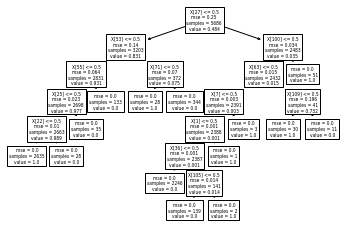

In [20]:
from sklearn.tree import plot_tree
plot_tree(regressor)

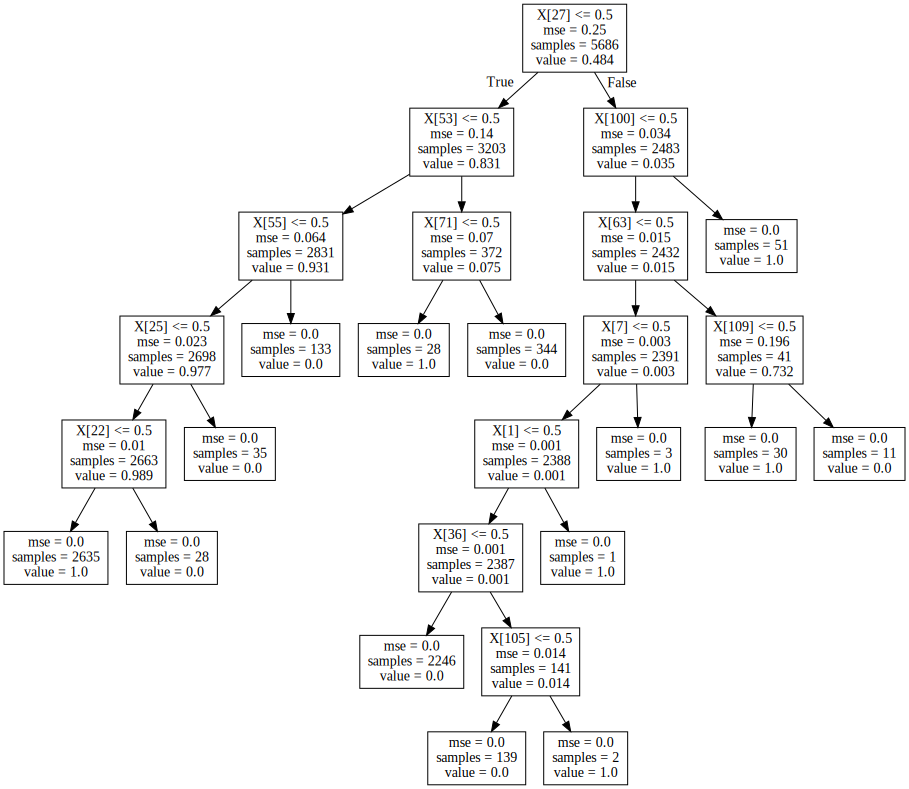

In [21]:
import graphviz # Refer to https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224
from sklearn import tree
dot_data = tree.export_graphviz(regressor)
graph = graphviz.Source(dot_data)
graph